In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

In [2]:
from logistic_regression import *

## Load Data

In [3]:
X_train, y_train = read_bank_note(test=False)
X_test, y_test = read_bank_note(test=True)

# Initial Review
## Maximum A Posteriori (MAP)

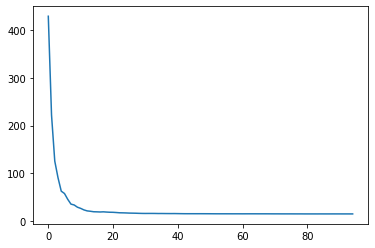

0.011467889908256881
0.01


In [13]:
model = LogisticRegression(version='map', sigma=1, gamma0=1e-3, d=1e-3)
model.fit(X_train, y_train)
plt.plot(model.loss)
plt.show()


y_pred = model.predict(X_train)
err_train = get_error(y_train, y_pred)

y_pred = model.predict(X_test)
err_test = get_error(y_test, y_pred)

print(err_train)
print(err_test)

## Maximum Likelihood (ML)

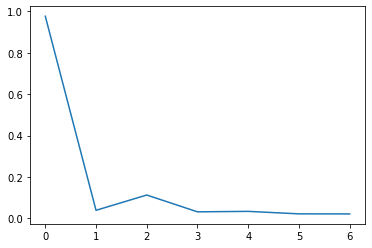

0.011467889908256881
0.014


In [20]:
model = LogisticRegression(version='ml', sigma=1, gamma0=4e-4, d=2e-4)
model.fit(X_train, y_train)
plt.plot(model.loss)
plt.show()


y_pred = model.predict(X_train)
err_train = get_error(y_train, y_pred)

y_pred = model.predict(X_test)
err_test = get_error(y_test, y_pred)

print(err_train)
print(err_test)

# Problems

In [4]:
variance = np.array([0.01, 0.1, 0.5, 1, 3, 5, 10, 100])

## Problem 2a

In [31]:
error_training=[]
error_test=[]

for v in variance:
    
    sigma=np.sqrt(v)
    
    model = LogisticRegression(version='map', sigma=sigma, gamma0=2e-3, d=1e-3)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_train)
    err_train = get_error(y_train, y_pred)

    y_pred = model.predict(X_test)
    err_test = get_error(y_test, y_pred)
    
    error_training.append(err_train)
    error_test.append(err_test)
    
error_training = np.array(error_training)
error_test = np.array(error_test)

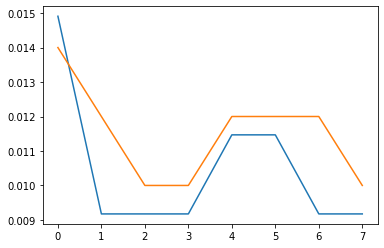

,Variance,TrainingError,TestError
0,0.01,0.014908,0.014
1,0.10,0.009174,0.012
2,0.50,0.009174,0.010
3,1.00,0.009174,0.010
4,3.00,0.011468,0.012
5,5.00,0.011468,0.012
6,10.00,0.009174,0.012
7,100.00,0.009174,0.010


In [32]:
plt.plot(error_training)
plt.plot(error_test)
plt.show()

df_map = pd.DataFrame({'Variance': variance, 'TrainingError': error_training, 'TestError': error_test})
df_map

## Problem 2b

In [33]:
error_training=[]
error_test=[]

for v in variance:
    
    sigma=np.sqrt(v)
    
    model = LogisticRegression(version='ml', sigma=sigma, gamma0=1e-3, d=1e-3)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_train)
    err_train = get_error(y_train, y_pred)

    y_pred = model.predict(X_test)
    err_test = get_error(y_test, y_pred)
    
    error_training.append(err_train)
    error_test.append(err_test)
    
error_training = np.array(error_training)
error_test = np.array(error_test)

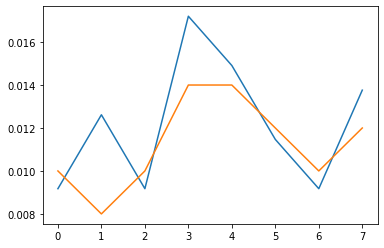

,Variance,TrainingError,TestError
0,0.01,0.009174,0.010
1,0.10,0.012615,0.008
2,0.50,0.009174,0.010
3,1.00,0.017202,0.014
4,3.00,0.014908,0.014
5,5.00,0.011468,0.012
6,10.00,0.009174,0.010
7,100.00,0.013761,0.012


In [34]:
plt.plot(error_training)
plt.plot(error_test)
plt.show()

df_ml = pd.DataFrame({'Variance': variance, 'TrainingError': error_training, 'TestError': error_test})
df_ml